# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Used to 
from datetime import datetime 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("", "output_data", "cities.csv")
OUTPUT_PLOT_PATH = os.path.join("", "output_data")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#### Openweathermap api restricted to 60 calls per minute.  Breakup data and perform timing breaks
# to prevent exceeding 60 calls per minute

def get_weather_results(cities, chunk_size = 50, units = "imperial"):
    
    SUCCESSFUL_API_CALL = 200 # Successful API code 
    url = "http://api.openweathermap.org/data/2.5/weather?"

    # Helper function 
    def print_separator(what="-", length=40):
        print(what*length)
    
    # Split the list of cities into lists of size 
    #num_chunks = (len(cities) + chunk_size - 1) // chunk_size
    #city_chunks = np.array_split(cities, num_chunks)
    city_chunks = [cities[i:i+chunk_size] for i in range(0, len(cities), chunk_size)]
    
    weather_results = []

    print("Beginning Data Retrieval")
    print_separator()
    
    chunk_number = 1
    for chunk in city_chunks:
        city_number = 1
        for city in chunk:
        
            # Build query URL and request your results in requested units
            query_url = f"{url}appid={api_key}&q={city}&units={units}"

            # Get weather data
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
        
            if weather_json['cod'] == SUCCESSFUL_API_CALL:
                print(f"Processing Record {city_number} of Set {chunk_number} | {city}")
                weather_results.append({'City' : city,\
                                        'Cloudiness' : weather_json['clouds']['all'],\
                                        'Country' : weather_json['sys']['country'],\
                                        'Date' : weather_json['dt'],\
                                        'Humidity' : weather_json['main']['humidity'],\
                                        'Lat' : weather_json['coord']['lat'],\
                                        'Lng' : weather_json['coord']['lon'],\
                                        'Max Temp' : weather_json['main']['temp_max'],\
                                        'Wind Speed' : weather_json['wind']['speed']})
            else:
                print(f"{weather_json['message'].capitalize()}.  Skipping...")
                      
            # Add a 60/chunk_size second interval between queries to stay within API query limits
            time.sleep(60/chunk_size)
                  
            city_number += 1
        chunk_number += 1
    
    print_separator()
    print("Data Retrieval Complete")                  
    print_separator()
    
    return weather_results

# Get the results
weather_results = get_weather_results(cities)


Beginning Data Retrieval
----------------------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | mpika
Processing Record 3 of Set 1 | grand gaube
Processing Record 4 of Set 1 | ipixuna
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | ushuaia
City not found.  Skipping...
Processing Record 9 of Set 1 | namatanai
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | sisimiut
City not found.  Skipping...
Processing Record 15 of Set 1 | jaisalmer
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | lakes entrance
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | unity
Processing Record 22 of Set 1 | katherine
Processing Record 23 of Set 1 | porto novo
Processing Re

City not found.  Skipping...
Processing Record 3 of Set 5 | mattru
Processing Record 4 of Set 5 | meadow lake
Processing Record 5 of Set 5 | lebork
Processing Record 6 of Set 5 | otjiwarongo
Processing Record 7 of Set 5 | san jose
Processing Record 8 of Set 5 | cabo san lucas
Processing Record 9 of Set 5 | pratapgarh
Processing Record 10 of Set 5 | ca mau
City not found.  Skipping...
Processing Record 12 of Set 5 | guerande
Processing Record 13 of Set 5 | auki
Processing Record 14 of Set 5 | cabra
Processing Record 15 of Set 5 | terme
Processing Record 16 of Set 5 | travesia
Processing Record 17 of Set 5 | brokopondo
Processing Record 18 of Set 5 | pimentel
Processing Record 19 of Set 5 | hithadhoo
Processing Record 20 of Set 5 | lebu
Processing Record 21 of Set 5 | sechura
Processing Record 22 of Set 5 | galesong
Processing Record 23 of Set 5 | cherskiy
Processing Record 24 of Set 5 | westport
City not found.  Skipping...
City not found.  Skipping...
Processing Record 27 of Set 5 | de

Processing Record 11 of Set 9 | altay
Processing Record 12 of Set 9 | olinda
Processing Record 13 of Set 9 | dunedin
Processing Record 14 of Set 9 | neuquen
Processing Record 15 of Set 9 | oranjemund
Processing Record 16 of Set 9 | thunder bay
Processing Record 17 of Set 9 | khor
Processing Record 18 of Set 9 | milkovo
Processing Record 19 of Set 9 | ganganagar
Processing Record 20 of Set 9 | ballina
Processing Record 21 of Set 9 | ribeira grande
Processing Record 22 of Set 9 | dzaoudzi
Processing Record 23 of Set 9 | mantua
Processing Record 24 of Set 9 | vanderhoof
Processing Record 25 of Set 9 | najran
Processing Record 26 of Set 9 | carauari
Processing Record 27 of Set 9 | north platte
Processing Record 28 of Set 9 | libreville
Processing Record 29 of Set 9 | bodden town
Processing Record 30 of Set 9 | powell river
Processing Record 31 of Set 9 | cockburn town
Processing Record 32 of Set 9 | rawson
Processing Record 33 of Set 9 | neryungri
Processing Record 34 of Set 9 | freeport
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(weather_results)

In [5]:
# The index is not needed in the csv file since it is just 0, 1, ...
weather_df.to_csv(output_data_file, index=False)

In [6]:
# When coming back to the problem, it is not necessary to
# run each API call again - just read in our CSV file:
#weather_df = pd.read_csv(output_data_file)

In [7]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,20,EC,1554564656,70,-0.74,-90.35,84.20,10.29
1,mpika,8,ZM,1554565292,57,-11.84,31.40,77.75,9.89
2,grand gaube,75,MU,1554565141,78,-20.01,57.66,78.80,13.87
3,ipixuna,75,BR,1554562800,78,-1.76,-48.80,82.40,11.41
4,chuy,32,UY,1554565296,85,-33.69,-53.46,70.82,9.78


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
# A function to perform the plotting.

def plot_weather_data(df, x, y, xlabel="", ylabel="", title="", filename=None, **kwargs):
    """Produce scatter plots for the weather data.
    
    Args:
        df: a pandas dataframe
        x: a column name in a pandas dataframe for plotting on x-axis
        y: a column name in a pandas dataframe for plotting on y-axis
        xlabel: the x-axis label
        ylabel: the y-axis label
        title: the title to produce on the plot
        filename: filename for saving .png file.  If `None`, no file is saved.
        **kwargs: addtional plot parameters passed to matplotlib.pyplot.scatter
    """
    # Function required matplotlib.pyplot being imported as plt
    plt.scatter(df[x], df[y], **kwargs)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    if filename is not None:
        plt.savefig(filename)
    plt.show()

# For the plot titles, get the date the data was retrived:
# from datetime import datetime
ts = weather_df.loc[0, 'Date'] #openweathmap api returns GMT unix timestamp
retrieval_date = datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y')

# plot_options to pass into the plotting function
plot_options = {'marker' : 'o', 'edgecolors' : 'black', 'facecolors' : 'steelblue'}

#### Latitude vs. Temperature Plot

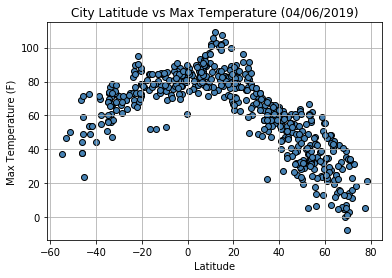

In [9]:
# Using the function, retrieval_date, and plot_options defined above
plot_weather_data(weather_df, 'Lat', 'Max Temp',\
                 xlabel="Latitude", ylabel="Max Temperature (F)",\
                 title=f"City Latitude vs Max Temperature ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, "maxtemp.png"),\
                 **plot_options)


#### Latitude vs. Humidity Plot

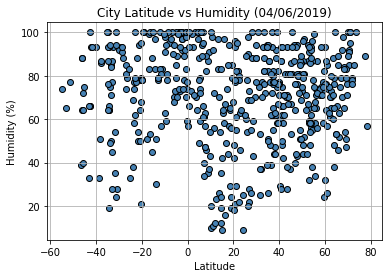

In [10]:
# Using the function, retrieval_date, and plot_options defined above
plot_weather_data(weather_df, 'Lat', 'Humidity',\
                 xlabel="Latitude", ylabel="Humidity (%)",\
                 title=f"City Latitude vs Humidity ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, "humidity.png"),\
                 **plot_options)


#### Latitude vs. Cloudiness Plot

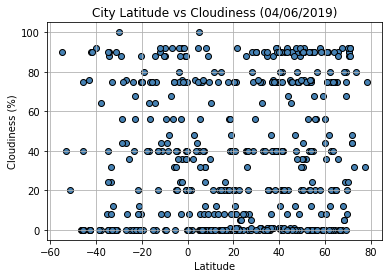

In [11]:
# Using the function, retrieval_date, and plot_options defined above
plot_weather_data(weather_df, 'Lat', 'Cloudiness',\
                 xlabel="Latitude", ylabel="Cloudiness (%)",\
                 title=f"City Latitude vs Cloudiness ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, "cloudiness.png"),\
                 **plot_options)


#### Latitude vs. Wind Speed Plot

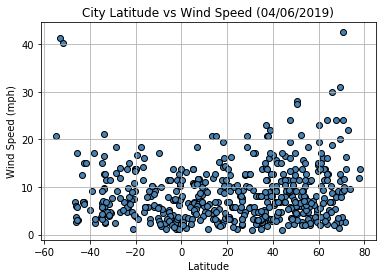

In [12]:
# Using the function, retrieval_date, and plot_options defined above
plot_weather_data(weather_df, 'Lat', 'Wind Speed',\
                 xlabel="Latitude", ylabel="Wind Speed (mph)",\
                 title=f"City Latitude vs Wind Speed ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, "windspeed.png"),\
                 **plot_options)


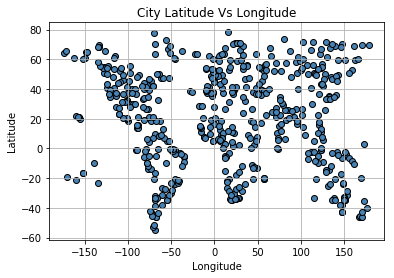

In [13]:
# For fun
plot_weather_data(weather_df, 'Lng', 'Lat',\
                 xlabel="Longitude", ylabel="Latitude",\
                 title="City Latitude Vs Longitude",\
                 filename=None, **plot_options)
